**Setup**

In [3]:
# For reference, I was running on Cheaha with 8 cores each at 4 GB memory (32 GB RAM)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from statistics import multimode # Used to find most frequent term in nearest neighbors

import tensorflow as tf
from tensorflow import keras

# This is needed if using environment/Cheaha session with only CPU(s) and no GPU(s)
# Get list of available GPUs, if they exist
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        # Set all GPUs as visible if they are not already
        tf.config.set_visible_devices(gpus, 'GPU')
        # Get list of devices available to TensorFlow
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)
else:
    print("No GPUs found, using CPU instead")
    # Hiding all GPUs by making list empty 
    tf.config.set_visible_devices([], 'GPU')

No GPUs found, using CPU instead


**Question 1.1 - 1.2:**

L1 Distance Matrix:
[[    0. 40963. 43084. 37764. 42172. 44602. 40581. 42496. 39886. 40604.]
 [27389.     0. 17481. 26753. 24249. 29495. 26242. 26877. 23499. 21145.]
 [27060. 24759.     0. 26168. 29808. 34542. 30777. 34484. 30082. 29008.]
 [23164. 24447. 28872.     0. 27192. 31926. 26881. 27772. 27722. 24600.]
 [30532. 26439. 30352. 28872.     0. 30334. 26057. 28484. 23058. 25056.]
 [30918. 33481. 33810. 32842. 32642.     0. 31051. 38086. 33172. 32610.]
 [27771. 26750. 26567. 24831. 23863. 30389.     0. 31099. 25417. 25623.]
 [27648. 26883. 32076. 28548. 29116. 34874. 31621.     0. 24270. 25500.]
 [52274. 48693. 47230. 48566. 46318. 49516. 45239. 50482.     0. 45774.]
 [23652. 19559. 22704. 23784. 18208. 23966. 21737. 23396. 22322.     0.]]


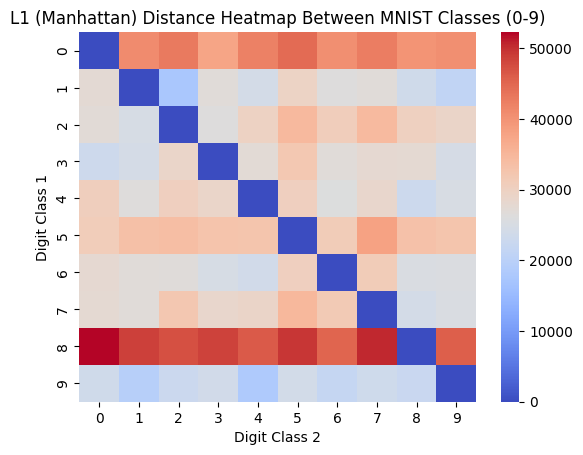

In [3]:
# Load the MNIST dataset
# x_train/test stores all the image data
# y_train/test stores the digit label (0-9) for that image
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Take one random image from each class
classes = range(10)
selected_images = {}

for digit in classes:
    indices = np.where(y_train == digit)[0] # Get index locations of images with the current digit class target (0-9)
    random_index = np.random.choice(indices) # Pick a random index
    selected_images[digit] = x_train[random_index]  # Store the random image selected for the current digit class

# Estimate L1 distances to every other class
l1_distances = np.zeros((10, 10))  # Matrix to store L1 distances

for digit1 in classes:
    img1 = selected_images[digit1].flatten()  # Flatten image to 1D array for easier comparison
    for digit2 in classes:
        if digit1 != digit2:  # Skip self comparison
            img2 = selected_images[digit2].flatten()
            l1_distances[digit1, digit2] = np.sum(np.abs(img1 - img2)) # Sum all the absolute differences b/t each pixel

# Print the L1 distance matrix as cell output
print("L1 Distance Matrix:")
print(l1_distances)

# Convert to DataFrame for labeling
l1_df = pd.DataFrame(l1_distances, index = classes, columns = classes)

# Plot heatmap
sns.heatmap(l1_df, cmap = 'coolwarm') # Create heatmap with coolwarm theme
plt.title("L1 (Manhattan) Distance Heatmap Between MNIST Classes (0-9)")
plt.xlabel("Digit Class 2")
plt.ylabel("Digit Class 1")
plt.show()

**Question 1.3 - 1.4:**

L1 Distance Matrix:
[[     0. 370276. 367059. 346212. 355701. 320339. 472905. 396845. 291230.
  394850.]
 [413084.      0. 373871. 439296. 416785. 336879. 371429. 379593. 421946.
  371198.]
 [418861. 408977.      0. 448145. 379810. 374912. 393846. 383066. 418507.
  390543.]
 [439964. 345344. 336239.      0. 309265. 408303. 347877. 399561. 418874.
  327934.]
 [429451. 365295. 400734. 472815.      0. 370910. 372948. 387000. 420137.
  357357.]
 [463533. 444945. 408448. 374545. 411938.      0. 406006. 358106. 382283.
  363023.]
 [312759. 412443. 390026. 433947. 408620. 377610.      0. 431844. 413781.
  409369.]
 [389075. 402231. 399014. 378935. 395336. 425254. 351260.      0. 446833.
  386613.]
 [494434. 359878. 364341. 362950. 360151. 399797. 370091. 336015.      0.
  331716.]
 [390814. 411394. 393329. 453122. 424979. 418289. 374503. 394443. 449340.
       0.]]


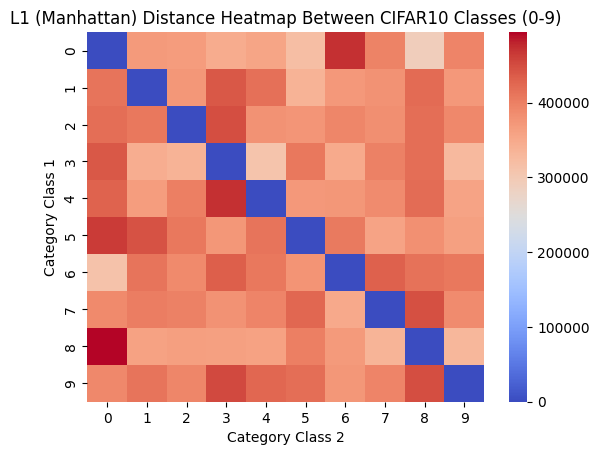

In [4]:
# Load the CIFAR10 dataset
# x_train/test stores all the image data
# y_train/test stores the label (0-9) for that image (airplane, bird, dog, etc.)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Take one random image from each class
classes = range(10)
selected_images = {}

for category in classes:
    indices = np.where(y_train == category)[0] # Get index locations of images with the current category class target (0-9)
    random_index = np.random.choice(indices) # Pick a random index
    selected_images[category] = x_train[random_index]  # Store the random image selected for the current category class

# Estimate L1 distances to every other class
l1_distances = np.zeros((10, 10))  # Matrix to store L1 distances

for category1 in classes:
    img1 = selected_images[category1].flatten()  # Flatten image to 1D array for easier comparison
    
    for category2 in classes:
        if category1 != category2:  # Skip self comparison
            img2 = selected_images[category2].flatten()
            l1_distances[category1, category2] = np.sum(np.abs(img1 - img2)) # Sum all the absolute differences b/t each pixel

# Print the L1 distance matrix as cell output
print("L1 Distance Matrix:")
print(l1_distances)

# Convert to pandas dataFrame for labeling
l1_df = pd.DataFrame(l1_distances, index = classes, columns = classes)

# Plot heatmap
sns.heatmap(l1_df, cmap = 'coolwarm') # Create heatmap with coolwarm theme
plt.title("L1 (Manhattan) Distance Heatmap Between CIFAR10 Classes (0-9)")
plt.xlabel("Category Class 2")
plt.ylabel("Category Class 1")
plt.show()

**Question 1.5:**

In [5]:
# Find the closest neighboring class for each image category class based on L1 distance
closest_neighbors = {}

category_dict = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

for category in classes:
    distances = l1_distances[category] # Get row of index (category) 'n' from l1_distances matrix
    distances[category] = np.inf # Ignore self-comparison by setting it's own category comparison (0) to infinity
    closest_class = np.argmin(distances) # Get the index (category) with the minimum distance
    closest_neighbors[category] = closest_class # Add the closest class to closest_neighbors for class 'n'

# Display results
print("Closest Neighboring Class (K=1) for Each Category:")
for category, neighbor in closest_neighbors.items():
    print(f"Category {category} ({category_dict[category]}) --> Closest Class: {neighbor} ({category_dict[neighbor]})")

print("\nFrom the perspective of the computer, all it sees is 8 bit integers for each pixel in a grayscale image.\nIt then is simply taking the sum of all of the absolute differences in pixel values from one picture to another.\nSo from that perspective, it can make sense that, to the computer, an airplane almost looks like a ship since\nthat comparison simply had the minimum overall difference in pixel values.\n\nBut to us, as humans, it is obvious for us the difference between an airplane and a ship.")

Closest Neighboring Class (K=1) for Each Category:
Category 0 (airplane) --> Closest Class: 8 (ship)
Category 1 (automobile) --> Closest Class: 5 (dog)
Category 2 (bird) --> Closest Class: 5 (dog)
Category 3 (cat) --> Closest Class: 4 (deer)
Category 4 (deer) --> Closest Class: 9 (truck)
Category 5 (dog) --> Closest Class: 7 (horse)
Category 6 (frog) --> Closest Class: 0 (airplane)
Category 7 (horse) --> Closest Class: 6 (frog)
Category 8 (ship) --> Closest Class: 9 (truck)
Category 9 (truck) --> Closest Class: 6 (frog)

From the perspective of the computer, all it sees is 8 bit integers for each pixel in a grayscale image.
It then is simply taking the sum of all of the absolute differences in pixel values from one picture to another.
So from that perspective, it can make sense that, to the computer, an airplane almost looks like a ship since
that comparison simply had the minimum overall difference in pixel values.

But to us, as humans, it is obvious for us the difference between an 

**Question 1.6:**

L2 Distance Matrix:
[[  0. 121. 139. 141. 139. 128. 129. 132. 146. 142.]
 [121.   0. 124. 129. 117. 111. 125. 112. 138. 127.]
 [139. 124.   0. 140. 138. 132. 134. 129. 154. 146.]
 [141. 129. 140.   0. 131. 133. 139. 134. 149. 140.]
 [139. 117. 138. 131.   0. 128. 134. 120. 151. 134.]
 [128. 111. 132. 133. 128.   0. 131. 120. 149. 138.]
 [129. 125. 134. 139. 134. 131.   0. 122. 147. 142.]
 [132. 112. 129. 134. 120. 120. 122.   0. 145. 133.]
 [146. 138. 154. 149. 151. 149. 147. 145.   0. 151.]
 [142. 127. 146. 140. 134. 138. 142. 133. 151.   0.]]


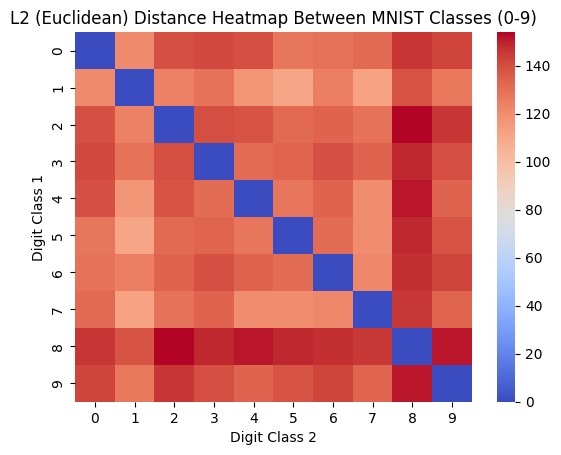

In [6]:
# MNIST Dataset but with L2 distance
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Take one random image from each class
classes = range(10)
selected_images = {}

for digit in classes:
    indices = np.where(y_train == digit)[0] # Get index locations of images with the current digit class target (0-9)
    random_index = np.random.choice(indices) # Pick a random index
    selected_images[digit] = x_train[random_index]  # Store the random image selected for the current digit class

# Estimate L2 distances to every other class
l2_distances = np.zeros((10, 10))  # Matrix to store L2 distances

for digit1 in classes:
    img1 = selected_images[digit1].flatten()  # Flatten image to 1D array for easier comparison
    
    for digit2 in classes:
        if digit1 != digit2:  # Skip self comparison
            img2 = selected_images[digit2].flatten()
            l2_distances[digit1, digit2] = np.round(np.sqrt(np.sum(np.square(img1 - img2)))) # Take the root of the sum of the squared differences b/t each pixel value
            
# Print the L2 distance matrix as cell output
print("L2 Distance Matrix:")
print(l2_distances)

# Convert to DataFrame for labeling
l2_df = pd.DataFrame(l2_distances, index = classes, columns = classes)

# Plot heatmap
sns.heatmap(l2_df, cmap = 'coolwarm') # Create heatmap with coolwarm theme
plt.title("L2 (Euclidean) Distance Heatmap Between MNIST Classes (0-9)")
plt.xlabel("Digit Class 2")
plt.ylabel("Digit Class 1")
plt.show()

L2 Distance Matrix:
[[  0. 565. 557. 574. 570. 565. 578. 559. 560. 574.]
 [565.   0. 566. 574. 585. 571. 563. 569. 548. 574.]
 [557. 566.   0. 576. 567. 569. 573. 569. 559. 576.]
 [574. 574. 576.   0. 569. 568. 567. 566. 572. 569.]
 [570. 585. 567. 569.   0. 568. 576. 566. 573. 575.]
 [565. 571. 569. 568. 568.   0. 562. 568. 574. 564.]
 [578. 563. 573. 567. 576. 562.   0. 577. 572. 568.]
 [559. 569. 569. 566. 566. 568. 577.   0. 569. 565.]
 [560. 548. 559. 572. 573. 574. 572. 569.   0. 562.]
 [574. 574. 576. 569. 575. 564. 568. 565. 562.   0.]]


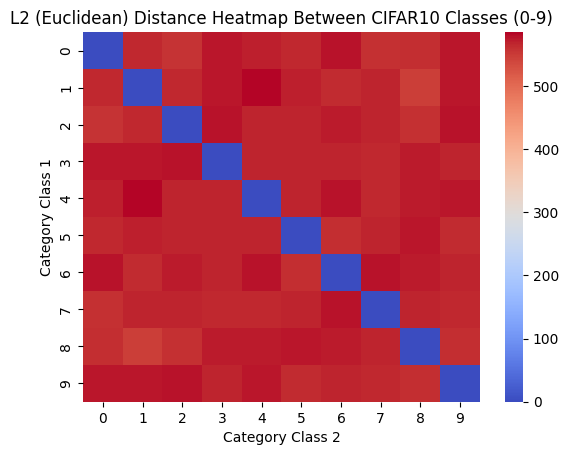

In [7]:
# CIFAR10 Dataset but with L2 distance
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Take one random image from each class
classes = range(10)
selected_images = {}

for category in classes:
    indices = np.where(y_train == category)[0] # Get index locations of images with the current category class target (0-9)
    random_index = np.random.choice(indices) # Pick a random index
    selected_images[category] = x_train[random_index]  # Store the random image selected for the current category class

# Estimate L2 distances to every other class
l2_distances = np.zeros((10, 10))  # Matrix to store L2 distances

for category1 in classes:
    img1 = selected_images[category1].flatten()  # Flatten image to 1D array for easier comparison
    
    for category2 in classes:
        if category1 != category2:  # Skip self comparison
            img2 = selected_images[category2].flatten()
            l2_distances[category1, category2] = np.round(np.sqrt(np.sum(np.square(img1 - img2)))) # Take the root of the sum of the squared differences b/t each pixel value

# Print the L2 distance matrix as cell output
print("L2 Distance Matrix:")
print(l2_distances)

# Convert to pandas dataFrame for labeling
l2_df = pd.DataFrame(l2_distances, index = classes, columns = classes)

# Plot heatmap
sns.heatmap(l2_df, cmap = 'coolwarm') # Create heatmap with coolwarm theme
plt.title("L2 (Euclidean) Distance Heatmap Between CIFAR10 Classes (0-9)")
plt.xlabel("Category Class 2")
plt.ylabel("Category Class 1")
plt.show()

**Question 2.1 - 2.3:**

In [5]:
# Load the MNIST dataset
# x_train/test stores all the image data
# y_train/test stores the digit label (0-9) for that image
# MNIST has 60,000 training samples and 10,000 testing samples (~80%/20% train/test data split)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Store all predicted digit classes of x_test digit images
predictions = []

# Pull only first 500 images & labels from x_test & y_test as it takes ~45 minutes for all 10,000 test images
# I timed 100 iterations as 28.08s --> 10,000 iterations would take 46 min
# Perhaps my approach is incorrect or my algorithm is not optimized so it runs very slow
x_test_subset = x_test[:500]
y_test_subset = y_test[:500]

# Start timer for computing
start_time = time.time()

# K-nearest neighbor classifier for K=5 using L1 distance
k = 5
for sample in x_test_subset:
    # Flatten images
    sample_flat = sample.flatten() # Flatten 28x28 uint8 image to 1D array
    x_train_flat = x_train.reshape(60000, 784) # Reshape (60000, 28, 28) to (60000, 784)
    
    # Take sum of differences between the new sample image from x_test and all of the images in x_train
    l1_distances = np.sum(np.abs(x_train_flat - sample_flat), axis = 1) 
    
    # Sort distances from least to greatest and get indices of only the first 'k' (Ex. k = 5, then the 5 nearest neighbors)
    k_nearest_indices = np.argsort(l1_distances)[:k]
    
    # Get the digit classes of the k nearest neighbors
    k_nearest_labels = y_train[k_nearest_indices]

    # Find the most popular digit class using multimode (gets list of the most frequent numbers)
    frequent_labels = multimode(k_nearest_labels.flatten())
    most_popular_label = frequent_labels[0]

    predictions.append(most_popular_label)
    
# Estimate computing time
end_time = time.time()
elapsed_time = end_time - start_time

# Compute accuracy
accuracy = np.mean(predictions == y_test_subset)

# Print results
print(f"KNN Accuracy for K = 5: {accuracy * 100:.2f}%")
print(f"Computing Time: {elapsed_time:.2f} seconds")

KNN Accuracy for K = 5: 39.40%
Computing Time: 28.88 seconds


**Question 2.4:**

In [6]:
# K = 25

# Store all predicted digit classes of x_test digit images
predictions = []

# Start timer for computing
start_time = time.time()

# K-nearest neighbor classifier for K=5 using L1 distance
k = 25
for sample in x_test_subset:
    # Flatten images
    sample_flat = sample.flatten() # Flatten 28x28 uint8 image to 1D array
    x_train_flat = x_train.reshape(60000, 784) # Reshape (60000, 28, 28) to (60000, 784)
    
    # Take sum of differences between the new sample image from x_test and all of the images in x_train
    l1_distances = np.sum(np.abs(x_train_flat - sample_flat), axis = 1) 
    
    # Sort distances from least to greatest and get indices of only the first 'k' (Ex. k = 5, then the 5 nearest neighbors)
    k_nearest_indices = np.argsort(l1_distances)[:k]
    
    # Get the digit classes of the k nearest neighbors
    k_nearest_labels = y_train[k_nearest_indices]

    # Find the most popular digit class using multimode (gets list of the most frequent numbers)
    frequent_labels = multimode(k_nearest_labels.flatten())
    most_popular_label = frequent_labels[0]

    predictions.append(most_popular_label)
    
# Estimate computing time
end_time = time.time()
elapsed_time = end_time - start_time

# Compute accuracy
accuracy = np.mean(predictions == y_test_subset)

# Print results
print(f"KNN Accuracy for K = 25: {accuracy * 100:.2f}%")
print(f"Computing Time: {elapsed_time:.2f} seconds")

# K = 55

# Store all predicted digit classes of x_test digit images
predictions = []

# Start timer for computing
start_time = time.time()

# K-nearest neighbor classifier for K=5 using L1 distance
k = 55
for sample in x_test_subset:
    # Flatten images
    sample_flat = sample.flatten() # Flatten 28x28 uint8 image to 1D array
    x_train_flat = x_train.reshape(60000, 784) # Reshape (60000, 28, 28) to (60000, 784)
    
    # Take sum of differences between the new sample image from x_test and all of the images in x_train
    l1_distances = np.sum(np.abs(x_train_flat - sample_flat), axis = 1) 
    
    # Sort distances from least to greatest and get indices of only the first 'k' (Ex. k = 5, then the 5 nearest neighbors)
    k_nearest_indices = np.argsort(l1_distances)[:k]
    
    # Get the digit classes of the k nearest neighbors
    k_nearest_labels = y_train[k_nearest_indices]

    # Find the most popular digit class using multimode (gets list of the most frequent numbers)
    frequent_labels = multimode(k_nearest_labels.flatten())
    most_popular_label = frequent_labels[0]

    predictions.append(most_popular_label)
    
# Estimate computing time
end_time = time.time()
elapsed_time = end_time - start_time

# Compute accuracy
accuracy = np.mean(predictions == y_test_subset)

# Print results
print(f"KNN Accuracy for K = 55: {accuracy * 100:.2f}%")
print(f"Computing Time: {elapsed_time:.2f} seconds")

# K = 105

# Store all predicted digit classes of x_test digit images
predictions = []

# Start timer for computing
start_time = time.time()

# K-nearest neighbor classifier for K=5 using L1 distance
k = 105
for sample in x_test_subset:
    # Flatten images
    sample_flat = sample.flatten() # Flatten 28x28 uint8 image to 1D array
    x_train_flat = x_train.reshape(60000, 784) # Reshape (60000, 28, 28) to (60000, 784)
    
    # Take sum of differences between the new sample image from x_test and all of the images in x_train
    l1_distances = np.sum(np.abs(x_train_flat - sample_flat), axis = 1) 
    
    # Sort distances from least to greatest and get indices of only the first 'k' (Ex. k = 5, then the 5 nearest neighbors)
    k_nearest_indices = np.argsort(l1_distances)[:k]
    
    # Get the digit classes of the k nearest neighbors
    k_nearest_labels = y_train[k_nearest_indices]

    # Find the most popular digit class using multimode (gets list of the most frequent numbers)
    frequent_labels = multimode(k_nearest_labels.flatten())
    most_popular_label = frequent_labels[0]

    predictions.append(most_popular_label)
    
# Estimate computing time
end_time = time.time()
elapsed_time = end_time - start_time

# Compute accuracy
accuracy = np.mean(predictions == y_test_subset)

# Print results
print(f"KNN Accuracy for K = 105: {accuracy * 100:.2f}%")
print(f"Computing Time: {elapsed_time:.2f} seconds")

KNN Accuracy for K = 25: 28.60%
Computing Time: 28.76 seconds
KNN Accuracy for K = 55: 24.60%
Computing Time: 28.79 seconds
KNN Accuracy for K = 105: 21.80%
Computing Time: 28.81 seconds


**Question 2.5:**

In [7]:
# L2 (Euclidean Distance)

# K = 5

# Store all predicted digit classes of x_test digit images
predictions = []

# Start timer for computing
start_time = time.time()

# K-nearest neighbor classifier for K=5 using L1 distance
k = 5
for sample in x_test_subset:
    # Flatten images
    sample_flat = sample.flatten() # Flatten 28x28 uint8 image to 1D array
    x_train_flat = x_train.reshape(60000, 784) # Reshape (60000, 28, 28) to (60000, 784)
    
    # Take the root of the sum of the squared differences b/t each pixel value
    l2_distances = np.round(np.sqrt(np.sum(np.square(x_train_flat - sample_flat), axis = 1))) 
    
    # Sort distances from least to greatest and get indices of only the first 'k' (Ex. k = 5, then the 5 nearest neighbors)
    k_nearest_indices = np.argsort(l2_distances)[:k]
    
    # Get the digit classes of the k nearest neighbors
    k_nearest_labels = y_train[k_nearest_indices]

    # Find the most popular digit class using multimode (gets list of the most frequent numbers)
    frequent_labels = multimode(k_nearest_labels.flatten())
    most_popular_label = frequent_labels[0]

    predictions.append(most_popular_label)
    
# Estimate computing time
end_time = time.time()
elapsed_time = end_time - start_time

# Compute accuracy
accuracy = np.mean(predictions == y_test_subset)

# Print results
print(f"KNN Accuracy for K = 5: {accuracy * 100:.2f}%")
print(f"Computing Time: {elapsed_time:.2f} seconds")

# K = 25

# Store all predicted digit classes of x_test digit images
predictions = []

# Start timer for computing
start_time = time.time()

# K-nearest neighbor classifier for K=25 using L2 distance
k = 25
for sample in x_test_subset:
    # Flatten images
    sample_flat = sample.flatten() # Flatten 28x28 uint8 image to 1D array
    x_train_flat = x_train.reshape(60000, 784) # Reshape (60000, 28, 28) to (60000, 784)
    
    # Take the root of the sum of the squared differences b/t each pixel value
    l2_distances = np.round(np.sqrt(np.sum(np.square(x_train_flat - sample_flat), axis = 1))) 
    
    # Sort distances from least to greatest and get indices of only the first 'k' (Ex. k = 5, then the 5 nearest neighbors)
    k_nearest_indices = np.argsort(l2_distances)[:k]
    
    # Get the digit classes of the k nearest neighbors
    k_nearest_labels = y_train[k_nearest_indices]

    # Find the most popular digit class using multimode (gets list of the most frequent numbers)
    frequent_labels = multimode(k_nearest_labels.flatten())
    most_popular_label = frequent_labels[0]

    predictions.append(most_popular_label)
    
# Estimate computing time
end_time = time.time()
elapsed_time = end_time - start_time

# Compute accuracy
accuracy = np.mean(predictions == y_test_subset)

# Print results
print(f"KNN Accuracy for K = 25: {accuracy * 100:.2f}%")
print(f"Computing Time: {elapsed_time:.2f} seconds")

# K = 55
# Store all predicted digit classes of x_test digit images
predictions = []

# Start timer for computing
start_time = time.time()

# K-nearest neighbor classifier for K=55 using L2 distance
k = 55
for sample in x_test_subset:
    # Flatten images
    sample_flat = sample.flatten() # Flatten 28x28 uint8 image to 1D array
    x_train_flat = x_train.reshape(60000, 784) # Reshape (60000, 28, 28) to (60000, 784)
    
    # Take the root of the sum of the squared differences b/t each pixel value
    l2_distances = np.round(np.sqrt(np.sum(np.square(x_train_flat - sample_flat), axis = 1))) 
    
    # Sort distances from least to greatest and get indices of only the first 'k' (Ex. k = 5, then the 5 nearest neighbors)
    k_nearest_indices = np.argsort(l2_distances)[:k]
    
    # Get the digit classes of the k nearest neighbors
    k_nearest_labels = y_train[k_nearest_indices]

    # Find the most popular digit class using multimode (gets list of the most frequent numbers)
    frequent_labels = multimode(k_nearest_labels.flatten())
    most_popular_label = frequent_labels[0]

    predictions.append(most_popular_label)
    
# Estimate computing time
end_time = time.time()
elapsed_time = end_time - start_time

# Compute accuracy
accuracy = np.mean(predictions == y_test_subset)

# Print results
print(f"KNN Accuracy for K = 55: {accuracy * 100:.2f}%")
print(f"Computing Time: {elapsed_time:.2f} seconds")

# K = 105
# Store all predicted digit classes of x_test digit images
predictions = []

# Start timer for computing
start_time = time.time()

# K-nearest neighbor classifier for K=105 using L2 distance
k = 105
for sample in x_test_subset:
    # Flatten images
    sample_flat = sample.flatten() # Flatten 28x28 uint8 image to 1D array
    x_train_flat = x_train.reshape(60000, 784) # Reshape (60000, 28, 28) to (60000, 784)
    
    # Take the root of the sum of the squared differences b/t each pixel value
    l2_distances = np.round(np.sqrt(np.sum(np.square(x_train_flat - sample_flat), axis = 1))) 
    
    # Sort distances from least to greatest and get indices of only the first 'k' (Ex. k = 5, then the 5 nearest neighbors)
    k_nearest_indices = np.argsort(l2_distances)[:k]
    
    # Get the digit classes of the k nearest neighbors
    k_nearest_labels = y_train[k_nearest_indices]

    # Find the most popular digit class using multimode (gets list of the most frequent numbers)
    frequent_labels = multimode(k_nearest_labels.flatten())
    most_popular_label = frequent_labels[0]

    predictions.append(most_popular_label)
    
# Estimate computing time
end_time = time.time()
elapsed_time = end_time - start_time

# Compute accuracy
accuracy = np.mean(predictions == y_test_subset)

# Print results
print(f"KNN Accuracy for K = 105: {accuracy * 100:.2f}%")
print(f"Computing Time: {elapsed_time:.2f} seconds")

KNN Accuracy for K = 5: 29.20%
Computing Time: 28.73 seconds
KNN Accuracy for K = 25: 27.80%
Computing Time: 28.70 seconds
KNN Accuracy for K = 55: 25.00%
Computing Time: 28.72 seconds
KNN Accuracy for K = 105: 23.40%
Computing Time: 28.70 seconds


**Question 3.1:**

In [18]:
# Load MNIST Dataset (PDF instructions say 'MNIST' not 'Fashion MNIST')
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Pre-process the image data by converting uint8 values (0-255) to decimal values from 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build model
# Flatten layer, dense layer with relu activation function, and output dense layer (10 neurons for digits 0-9)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model for 10 epochs
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2590 - accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1141 - accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0785 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0574 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0452 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0348 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0278 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0178 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.015

In [19]:
# Evaluate accuracy on test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc) # Should demonstrate overfitting to the training data

313/313 - 0s - loss: 0.0822 - accuracy: 0.9784 - 283ms/epoch - 903us/step

Test accuracy: 0.9783999919891357


**Question 3.2:**

In [27]:
# Changed # of neurons in activation layer from 128 layers to --> 784 layers (28x28 images)
# Flatten layer, dense layer with relu activation function, and output dense layer (10 neurons for digits 0-9)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model for 10 epochs
model.fit(train_images, train_labels, epochs=10)

# Evaluate accuracy on test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc) # Should demonstrate overfitting to the training data

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1906 - accuracy: 0.9428
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0756 - accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0484 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0253 - accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0170 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0143 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0113 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.012

**Question 3.3:**

In [28]:
# Changed # of neurons in activation layer from 128 layers to --> 1568 layers (2x from previous)
# Flatten layer, dense layer with relu activation function, and output dense layer (10 neurons for digits 0-9)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1568, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model for 10 epochs
model.fit(train_images, train_labels, epochs=10)

# Evaluate accuracy on test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc) # Should demonstrate overfitting to the training data

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1781 - accuracy: 0.9467
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0714 - accuracy: 0.9772
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0348 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0264 - accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0205 - accuracy: 0.9932
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0149 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0137 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.014

**Question 3.4:**

In [29]:
# Added activation layer with sigmoid activation function and 1568 layers
# Flatten layer, dense layer with relu activation function, and output dense layer (10 neurons for digits 0-9)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model for 10 epochs
model.fit(train_images, train_labels, epochs=10)

# Evaluate accuracy on test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc) # Should demonstrate overfitting to the training data

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2615 - accuracy: 0.9207
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1054 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0729 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0555 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0342 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0206 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

**Question 3.5:**

In [30]:
print("-----Comparison of accuracies for classifiers on test data:-----")
print("Base model: 97.84%")
print("784 Neurons for Activation Layer: 98.18%")
print("1568 Neurons for Activation Layer: 98.08%")
print("Base model w/ extra sigmoid activation layer of 784 neurons: 97.75%")

-----Comparison of accuracies for classifiers on test data:-----
Base model: 97.84%
784 Neurons for Activation Layer: 98.18%
1568 Neurons for Activation Layer: 98.08%
Base model w/ extra sigmoid activation layer of 784 neurons: 97.75%


**Question 4: Summary of Key Observations**

<ins>*Question 1 Summary:*</ins><br>
Using L1 and L2 (Manhattan & Euclidean) distance formulas with the MNIST and CIFAR10 Datasets it was interesting to see what the computer thought a digit or image looked the closest to. For example, when running L1 distance on a sample of 10 images from CIFAR10, the program reported an airplane looking the closest to a ship. Of course this doesn't mean the program thinks they look very similar, but compared to the rest of the images, the ship had the smallest sum of differences between its pixels and the airplane image's pixels. So from that perspective, it can make sense how the program would say the airplane looks closest to the ship.


<ins>*Question 2 Summary:*</ins><br>
Using KNN with various K values (5, 25, 55, 105) and different distance formulas of L1 and L2 proved to be interesting as for all K values and both distance formulas, the accuracies were below 40%. One obvious reason for this is because instead of testing the KNN for all 10,000 images, I only tested it on 500 images (otherwise it takes ~30 minutes to run probably due to my algorithm not being optimized at all). 

But another possible reason is that my implementation of KNN was incorrect. Specifically, where I get the most popular neighbor from the list of 'k' nearest neighbors. Currently, I just take the mode of the list which takes the most frequently shown neighbor in the list. But for a case where k = 5 nearest neighbors, the list could look something like this:
[5, 4, 7, 3, 2]

Here, all the numbers are unique so taking the mode would not be the best method to achieve a likely correct prediction. Maybe instead, I could take the average of all of the numbers and then round it to the closest integer.

Also, comparing L1 to L2 distance formula results, the average was 28.6% for the Manhattan distance formula, and an average of 26.35% for the Euclidean distance formula. I expected the Euclidean distance to be better since it takes the straight line distance vs manhattan taking the cartesian distance with no diagonal aspect.


<ins>*Question 3 Summary:*</ins><br>
The model that had an activation layer with 784 neurons (same as input size) resulted in the best accuracy. Doubling the number of neurons to 1568 did not increase the accuracy like I expected but instead decreased it slightly. I guess there is a limit to the method of just increasing the number of neurons/layers like MSRA Resnet did to win ILSVRC 2015. I also tried to add a 2nd activation layer with a sigmoid activation function but that just further decreased the accuracy. Training models takes expertise and some trial and error it seems.

**Question 5: Bonus**

In [4]:
# Apply KNN to Fashion MNIST Dataset

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

predictions = []

# Pull only first 500 images & labels from x_test & y_test as it takes ~45 minutes for all 10,000 test images
# I timed 100 iterations as 28.08s --> 10,000 iterations would take 46 min
# Perhaps my approach is incorrect or my algorithm is not optimized so it runs very slow
x_test_subset = x_test[:500]
y_test_subset = y_test[:500]

# Start timer for computing
start_time = time.time()

# K-nearest neighbor classifier for K=5 using L1 distance
k = 5
for sample in x_test_subset:
    # Flatten images
    sample_flat = sample.flatten() # Flatten 28x28 uint8 image to 1D array
    x_train_flat = x_train.reshape(60000, 784) # Reshape (60000, 28, 28) to (60000, 784)
    
    # Take sum of differences between the new sample image from x_test and all of the images in x_train
    l1_distances = np.sum(np.abs(x_train_flat - sample_flat), axis = 1) 
    
    # Sort distances from least to greatest and get indices of only the first 'k' (Ex. k = 5, then the 5 nearest neighbors)
    k_nearest_indices = np.argsort(l1_distances)[:k]
    
    # Get the digit classes of the k nearest neighbors
    k_nearest_labels = y_train[k_nearest_indices]

    # Find the most popular class using multimode (gets list of the most frequent numbers)
    frequent_labels = multimode(k_nearest_labels.flatten())
    most_popular_label = frequent_labels[0]

    predictions.append(most_popular_label)
    
# Estimate computing time
end_time = time.time()
elapsed_time = end_time - start_time

# Compute accuracy
accuracy = np.mean(predictions == y_test_subset)

# Print results
print(f"KNN Accuracy for Fashion MNIST with K = 5 and L1 Distance: {accuracy * 100:.2f}%")
print(f"Computing Time: {elapsed_time:.2f} seconds")

KNN Accuracy for Fashion MNIST with K = 5 and L1 Distance: 67.20%
Computing Time: 27.34 seconds


In [5]:
# Mulitlayer Perceptron (MLP) Model on Fashion MNIST Dataset

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Pre-process the image data by converting uint8 values (0-255) to decimal values from 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build model
# Flatten layer, dense layer with relu activation function, and output dense layer (10 neurons for digits 0-9)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model for 10 epochs
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4982 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3726 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3357 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3127 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2957 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2795 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2684 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2577 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2474 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

In [6]:
# Evaluate accuracy on test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc) # Should demonstrate overfitting to the training data

313/313 - 0s - loss: 0.3679 - accuracy: 0.8737 - 305ms/epoch - 973us/step

Test accuracy: 0.8737000226974487


In [9]:
print(f"KNN on fashion MNIST accuracy: {accuracy*100}%")
print(f"MLP on fashion MNIST accuracy: {test_acc*100}%")

KNN on fashion MNIST accuracy: 67.2%
MLP on fashion MNIST accuracy: 87.37000226974487%
